# Linear regression to predict prices of rental apartments

## Libraries and settings

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest/grades


## Import the apartment data

In [3]:
# Define columns for import
columns =['Student_ID','Branch','Grade','Study_Hours','IQ','Age','Weight','Parents_Income'
          ]
# Read and select variables
df_orig = pd.read_csv("../Data/student_grades_data.csv",
                      sep=",", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'Student_ID': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
#df = df.loc[(df['price'] >= 1000) &             (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(10000, 8)


,id,Branch,Grade,Study_Hours,IQ,Age,Weight,Parents_Income
0,Student_0001,History,F,54,132,19,68,50043
1,Student_0002,History,D,24,139,24,52,38024
2,Student_0003,Engineering,C,35,158,25,86,33798
3,Student_0004,Mathematics,F,35,104,20,85,118113
4,Student_0005,Biology,C,57,154,24,82,54247


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['Parents_Income'], 
                                                    df['IQ'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
9254     25656
1561    140638
1670     76455
6087     61175
6669     70602
Name: Parents_Income, dtype: int64 

y_train:
9254    120
1561    132
1670    119
6087     81
6669    155
Name: IQ, dtype: int64


### Fit the simple linear regression model

In [5]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            120.36
Slope of regression line (beta):          -0.000
p-value:                                  0.7332
R-squared (coefficient of determination): 0.0000


### Plot regression line

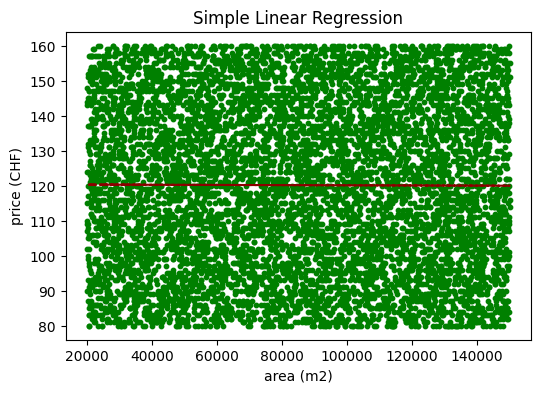

In [6]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [7]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 120.30


KeyError: 0

### Plot histogram of residuals

In [ ]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [ ]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [ ]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [ ]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

In [ ]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()

### Compare observed prices with predicted prices

In [ ]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')